In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\July2016_sorted_station_timeind.csv")

In [3]:
# df
# print(linear_model.LinearRegression.__doc__)
df.keys()

Index(['ObservationId', 'Timestamp', 'ParentLocationId', 'RelatedLocationId',
       'ReadingId', 'UtcTime', 'LocalTime', 'TimeZone', 'Temperature',
       'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindDirection',
       'WindDirectionCompass', 'WindSpeed', 'WindGust', 'RainSince9am',
       'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'time_index'],
      dtype='object')

In [23]:
# for (t+5) forecasts, which means forecasting for the next 5 hours
# df.WindDirectionCompass.unique()
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

df

,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,FeelsLike,...,RainSince9am,Pressure,RainfallLastHour,RainfallLast10Minutes,time_index,y_t_1,y_t_2,y_t_3,y_t_4,y_t_5
0,60,1467295200,1,94008,21,7/1/2016 0:00,7/1/2016 0:00,Australia/Hobart,8.8,6.7,...,0.0,1011,0.0,0.0,0.000000,11.0,11.7,12.6,12.5,11.8
1,59,1467298800,1,94008,21,7/1/2016 1:00,7/1/2016 1:00,Australia/Hobart,11.0,8.6,...,0.0,1012,0.0,0.0,0.041667,11.7,12.6,12.5,11.8,11.2
2,64,1467302400,1,94008,22,7/1/2016 2:00,7/1/2016 2:00,Australia/Hobart,11.7,9.2,...,0.0,1012,0.0,0.0,0.083333,12.6,12.5,11.8,11.2,10.8
3,63,1467306000,1,94008,22,7/1/2016 3:00,7/1/2016 3:00,Australia/Hobart,12.6,10.0,...,0.0,1011,0.0,0.0,0.125000,12.5,11.8,11.2,10.8,9.7
4,62,1467309600,1,94008,22,7/1/2016 4:00,7/1/2016 4:00,Australia/Hobart,12.5,10.3,...,0.0,1011,0.0,0.0,0.166667,11.8,11.2,10.8,9.7,11.1
5,61,1467313200,1,94008,22,7/1/2016 5:00,7/1/2016 5:00,Australia/Hobart,11.8,9.8,...,0.0,1011,0.0,0.0,0.208333,11.2,10.8,9.7,11.1,10.7
6,65,1467316800,1,94008,23,7/1/2016 6:00,7/1/2016 6:00,Australia/Hobart,11.2,9.4,...,0.0,1012,0.0,0.0,0.250000,10.8,9.7,11.1,10.7,9.3
7,66,1467320400,1,94008,24,7/1/2016 7:00,7/1/2016 7:00,Australia/Hobart,10.8,8.7,...,0.0,1012,0.0,0.0,0.291667,9.7,11.1,10.7,9.3,8.5
8,67,1467324000,1,94008,25,7/1/2016 8:00,7/1/2016 8:00,Australia/Hobart,9.7,7.6,...,0.0,1012,0.0,0.0,0.333333,11.1,10.7,9.3,8.5,9.4
9,68,1467327600,1,94008,26,7/1/2016 9:00,7/1/2016 9:00,Australia/Hobart,11.1,9.1,...,0.0,1012,0.0,0.0,0.375000,10.7,9.3,8.5,9.4,8.5


In [13]:
y_gt = df.as_matrix(columns=['Temperature'])
print(y_gt.shape)

(744, 1)


In [51]:
tot_points = y_gt.shape[0]
train_points = 400
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

744 400 344


In [15]:
df.y_t_1.name

'y_t_1'

In [18]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])
print(x_t1.shape)
print(y_gt_t1.shape)

(744, 5)
(744, 1)


In [47]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
print(y_gt_t1.shape[1])

1


In [54]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]

# Generate Test Sequence
x_t1_test = x_t1[train_points:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points:tot_points + 1,:]

print(x_t1_train.shape, y_gt_t1_train.shape)
print(x_t1_test.shape, y_t1_test.shape)

(401, 5) (401, 1)
(344, 5) (344, 1)


In [57]:
print(y_t1_test)

[[ 12.1]
 [ 12.6]
 [ 14.6]
 [ 12.2]
 [ 13.3]
 [ 14.1]
 [ 14.3]
 [ 14.6]
 [ 14.5]
 [ 14.1]
 [ 13.5]
 [ 14.4]
 [ 14. ]
 [ 13.2]
 [ 14.4]
 [ 13.5]
 [ 12.8]
 [ 11.8]
 [ 11.2]
 [ 10.3]
 [ 10.9]
 [ 11.1]
 [ 11. ]
 [ 10.3]
 [ 11.4]
 [ 11.4]
 [ 11.2]
 [ 11.3]
 [ 11.8]
 [ 12.2]
 [ 12.7]
 [ 13.2]
 [ 13.7]
 [ 13.7]
 [ 14. ]
 [ 14.1]
 [ 13.3]
 [ 13.2]
 [ 12.2]
 [ 11.2]
 [ 10.7]
 [  9.9]
 [  9.7]
 [ 10.2]
 [ 10.7]
 [  9.6]
 [ 10.4]
 [ 10.2]
 [ 10.6]
 [ 10.5]
 [ 11.5]
 [ 10. ]
 [  9.9]
 [  9.8]
 [ 11.3]
 [ 12.6]
 [ 13.5]
 [ 14.1]
 [ 14.7]
 [ 14.8]
 [ 14.6]
 [ 13.5]
 [ 11.2]
 [ 10.1]
 [  8.9]
 [  9.1]
 [  8.3]
 [  7.6]
 [  8.4]
 [  7.9]
 [  6.2]
 [  5.2]
 [  5.6]
 [  6.4]
 [  5.4]
 [  4.1]
 [  3.8]
 [  4.5]
 [  6.4]
 [  7.8]
 [ 10.2]
 [ 12.5]
 [ 13.2]
 [ 13.7]
 [ 12.3]
 [ 11.1]
 [ 10.6]
 [ 10.9]
 [  9.9]
 [  9.3]
 [  8.2]
 [  8.8]
 [  9.5]
 [  9.2]
 [  8.9]
 [ 11.3]
 [ 11.2]
 [ 10.6]
 [ 12.7]
 [ 12.6]
 [ 11.9]
 [ 12.4]
 [ 13.8]
 [ 14.7]
 [ 14.6]
 [ 14.6]
 [ 15. ]
 [ 11.9]
 [ 11.5]
 [ 11.2]
 [  8.8]
 

In [59]:
# call linear regression
regression_object = linear_model.LinearRegression()
regression_object.fit(x_t1_train,y_gt_t1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# col = np.ones(tot_obs).reshape(tot_obs,1)

In [24]:
# col.shape

In [25]:
# all_data = np.append(x_reshaped,col,1)

In [26]:
# all_data.shape

In [27]:
# regression_object.fit(all_data,y)

In [63]:
# all_data
# find Nan in array
nan_indices = np.argwhere(np.isnan(y_t1_test))
nan_indices

array([[343,   0]], dtype=int64)

In [65]:
# y_play = y_t1_test
# y_play

array([[ 12.1],
       [ 12.6],
       [ 14.6],
       [ 12.2],
       [ 13.3],
       [ 14.1],
       [ 14.3],
       [ 14.6],
       [ 14.5],
       [ 14.1],
       [ 13.5],
       [ 14.4],
       [ 14. ],
       [ 13.2],
       [ 14.4],
       [ 13.5],
       [ 12.8],
       [ 11.8],
       [ 11.2],
       [ 10.3],
       [ 10.9],
       [ 11.1],
       [ 11. ],
       [ 10.3],
       [ 11.4],
       [ 11.4],
       [ 11.2],
       [ 11.3],
       [ 11.8],
       [ 12.2],
       [ 12.7],
       [ 13.2],
       [ 13.7],
       [ 13.7],
       [ 14. ],
       [ 14.1],
       [ 13.3],
       [ 13.2],
       [ 12.2],
       [ 11.2],
       [ 10.7],
       [  9.9],
       [  9.7],
       [ 10.2],
       [ 10.7],
       [  9.6],
       [ 10.4],
       [ 10.2],
       [ 10.6],
       [ 10.5],
       [ 11.5],
       [ 10. ],
       [  9.9],
       [  9.8],
       [ 11.3],
       [ 12.6],
       [ 13.5],
       [ 14.1],
       [ 14.7],
       [ 14.8],
       [ 14.6],
       [ 13.5],
       [

In [60]:
print(regression_object.intercept_)
print(regression_object.coef_)

[ 2.60955745]
[[-0.08605355 -0.12819202 -0.09910304  0.05780181  0.01731773]]


In [66]:
# regression_object.predict(x)[0:5] predict first five data vectors
pred_y = regression_object.predict(x_t1_test)[0:5]

In [67]:
print(pred_y.shape)

(5, 1)


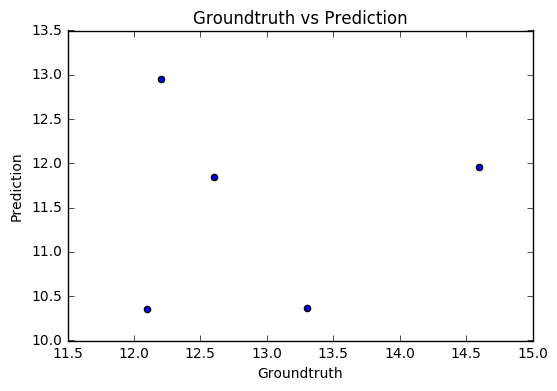

In [68]:
plt.scatter(y_t1_test[0:5,:],pred_y)
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth vs Prediction')

In [28]:
print(regression_object.predict(x)[105:109])
print(regression_object.coef_)
print(x[0:1,:].shape)

[[ 9.21757913]
 [ 8.73004195]
 [ 9.25000635]
 [ 9.36109553]]
[[ 0.48292765 -0.09096719  0.03912976  0.00929218 -0.24450393]]
(1, 5)


In [29]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format
obs = 105; # 1st observation
data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
intercept = regression_object.intercept_
coeffs = regression_object.coef_
print(data_vector.shape, coeffs.shape)
print(data_vector, coeffs)
print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
coeffs_1Darray = coeffs[0]
data_vector_1Darray = data_vector[0]

y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
print('prediction = %f\n' %y_predict)

(1, 5) (1, 5)
[[    4.375    88.       24.       32.     1020.   ]] [[ 0.48292765 -0.09096719  0.03912976  0.00929218 -0.24450393]]
-254.049844221
prediction = 9.217579



In [30]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

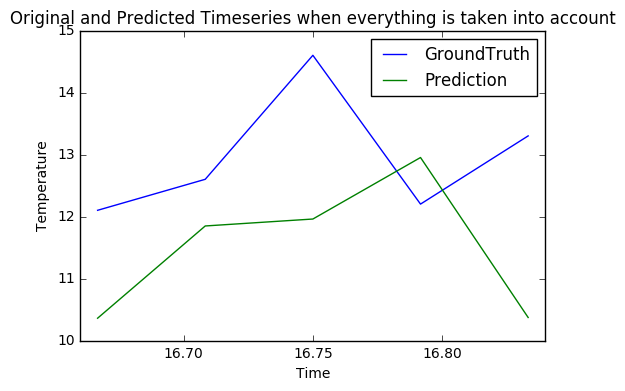

In [69]:
plt.plot(x_t1_test[0:5,0:1],y_t1_test[0:5,:],label="GroundTruth",color='b')
plt.plot(x_t1_test[0:5,0:1],pred_y,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

ValueError: x and y must be the same size

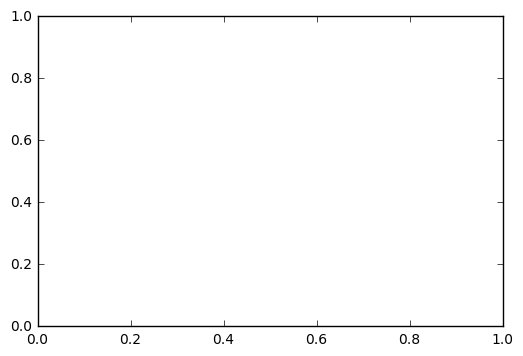

In [71]:
# scatter plots of data 
str_text='RainfallLast10Minutes'
plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
plt.xlabel('Temperature')
plt.ylabel(str_text)

In [42]:
df.as_matrix(columns=['Temperature'])

array([[  8.8],
       [ 11. ],
       [ 11.7],
       [ 12.6],
       [ 12.5],
       [ 11.8],
       [ 11.2],
       [ 10.8],
       [  9.7],
       [ 11.1],
       [ 10.7],
       [  9.3],
       [  8.5],
       [  9.4],
       [  8.5],
       [  9.1],
       [  7. ],
       [  8.6],
       [  8.1],
       [  9.2],
       [ 10.1],
       [ 11.3],
       [ 10.7],
       [ 10.9],
       [ 11.9],
       [ 13.5],
       [ 13.3],
       [ 13.9],
       [ 14.1],
       [ 13.6],
       [ 13.3],
       [ 12.7],
       [ 12.6],
       [ 12.7],
       [ 12.1],
       [ 10.8],
       [ 10.8],
       [ 10.3],
       [ 10.9],
       [ 11.6],
       [ 12.3],
       [ 12.4],
       [ 12.1],
       [ 10.7],
       [ 11.3],
       [ 11.9],
       [ 12.2],
       [ 12.9],
       [ 13.1],
       [ 14.1],
       [ 14.6],
       [ 14.6],
       [ 15. ],
       [ 14.9],
       [ 13.4],
       [ 12.5],
       [ 13. ],
       [ 12.7],
       [ 12.6],
       [ 12.1],
       [  9.6],
       [  9.2],
       [